                               Kaggle: IBM Attrition
Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the IBM Attrition data

In [3]:
kaggle_ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
kaggle_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Detailed summary of the data

In [4]:
kaggle_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
kaggle_ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking for NAN values

In [6]:
nandf=kaggle_ibm[kaggle_ibm.isna().any(axis=1)]
nandf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Checking for duplicates.

In [7]:
duplicate=kaggle_ibm['EmployeeNumber'].duplicated(keep=False)
duplicate.head()

0    False
1    False
2    False
3    False
4    False
Name: EmployeeNumber, dtype: bool

# 1. Show a breakdown of distance from home by job role and attrition.

In [8]:
df=kaggle_ibm[['Attrition','DistanceFromHome','JobRole']]
df.head()

,Attrition,DistanceFromHome,JobRole
0,Yes,1,Sales Executive
1,No,8,Research Scientist
2,Yes,2,Laboratory Technician
3,No,3,Research Scientist
4,No,2,Laboratory Technician


In [9]:
attrition = pd.get_dummies(df.Attrition,prefix='Attrition',prefix_sep='_')
attrition.head()

,Attrition_No,Attrition_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [10]:
df1=pd.concat([df,attrition],axis=1)
df1


,Attrition,DistanceFromHome,JobRole,Attrition_No,Attrition_Yes
0,Yes,1,Sales Executive,0,1
1,No,8,Research Scientist,1,0
2,Yes,2,Laboratory Technician,0,1
3,No,3,Research Scientist,1,0
4,No,2,Laboratory Technician,1,0
...,...,...,...,...,...
1465,No,23,Laboratory Technician,1,0
1466,No,6,Healthcare Representative,1,0
1467,No,4,Manufacturing Director,1,0
1468,No,2,Sales Executive,1,0


In [11]:
df2 = df1.drop('Attrition',axis=1)
df2.head()

,DistanceFromHome,JobRole,Attrition_No,Attrition_Yes
0,1,Sales Executive,0,1
1,8,Research Scientist,1,0
2,2,Laboratory Technician,0,1
3,3,Research Scientist,1,0
4,2,Laboratory Technician,1,0


In [16]:
df2['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [31]:
df3 = df2.groupby(['DistanceFromHome','JobRole']).sum().reset_index()
df3

,DistanceFromHome,JobRole,Attrition_No,Attrition_Yes
0,1,Healthcare Representative,23,0
1,1,Human Resources,8,1
2,1,Laboratory Technician,27,4
3,1,Manager,13,0
4,1,Manufacturing Director,23,1
...,...,...,...,...
219,29,Manager,3,1
220,29,Manufacturing Director,4,0
221,29,Research Scientist,3,1
222,29,Sales Executive,4,1


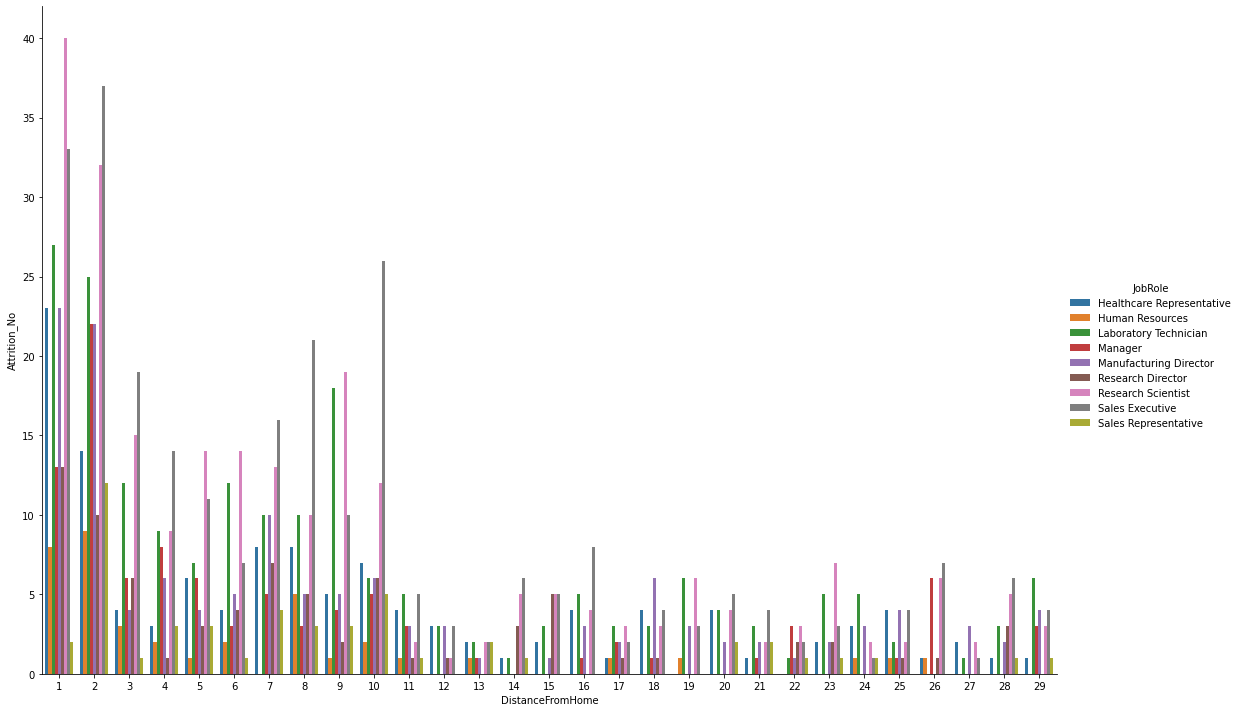

In [42]:
#for No attrition
sns.catplot(x='DistanceFromHome',y='Attrition_No',hue='JobRole',kind='bar',data=df3,height=10,aspect=1.5)

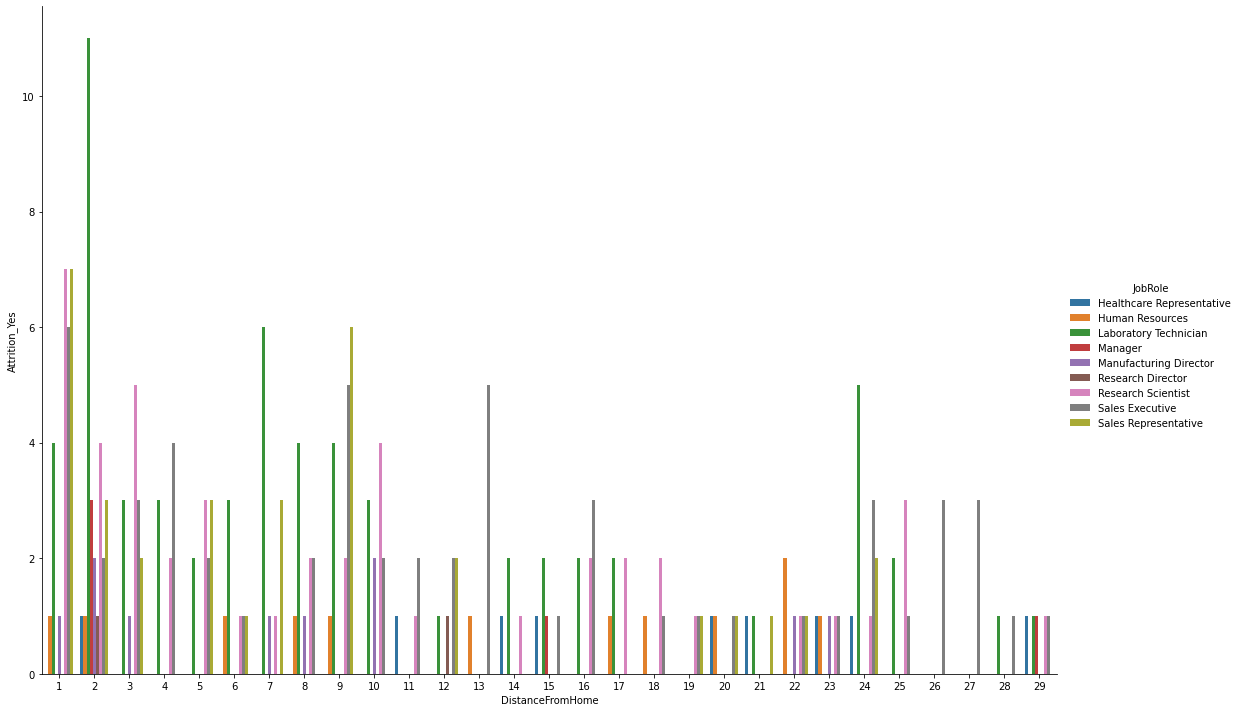

In [43]:
#for Yes attrition
sns.catplot(x='DistanceFromHome',y='Attrition_Yes',hue='JobRole',kind='bar',data=df3,height=10,aspect=1.5)

# 2. Compare average monthly income by education and attrition.

In [48]:
df4 = kaggle_ibm[['Attrition','Education','MonthlyIncome']]
df4.head()

,Attrition,Education,MonthlyIncome
0,Yes,2,5993
1,No,1,5130
2,Yes,2,2090
3,No,4,2909
4,No,1,3468


In [52]:
df5 = df4.groupby(['Education','Attrition']).mean().reset_index()
df5

,Education,Attrition,MonthlyIncome
0,1,No,5926.129496
1,1,Yes,4360.161290
2,2,No,6586.058824
3,2,Yes,4282.545455
4,3,No,6882.919662
5,3,Yes,4770.242424
6,4,No,7087.814706
7,4,Yes,5335.155172
8,5,No,8559.906977
9,5,Yes,5850.200000


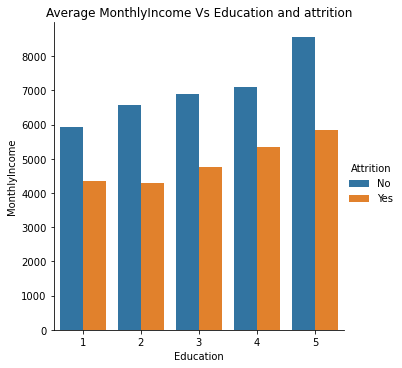

In [57]:
sns.catplot(x='Education',y='MonthlyIncome',hue='Attrition',kind='bar',data=df5)
plt.title('Average MonthlyIncome Vs Education and attrition')
plt.show()
